# Random forest classifier

In [ ]:
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt

msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")

In [ ]:
import os
import pandas as pd

DATA_PATH = "msft_data.json"

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        msft_hist = pd.read_json(DATA_PATH)
else:
    msft = yf.Ticker("MSFT")
    msft_hist = msft.history(period="max")

    # Save file to json in case we need it later.  This prevents us from having to re-download it every time.
    msft_hist.to_json(DATA_PATH)

In [ ]:
msft_hist.head(-1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1986-03-13,0.055654,0.063838,0.055654,0.061109,1031788800,0.00,0.0
1986-03-14,0.061109,0.064383,0.061109,0.063292,308160000,0.00,0.0
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,0.00,0.0
1986-03-18,0.064384,0.064929,0.062201,0.062746,67766400,0.00,0.0
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,0.00,0.0
...,...,...,...,...,...,...,...
2022-05-16,259.355934,265.202334,255.185655,260.892365,32550900,0.00,0.0
2022-05-17,265.491640,267.706483,261.850127,266.200012,28828800,0.00,0.0
2022-05-18,263.000000,263.600006,252.770004,254.080002,31356000,0.62,0.0
2022-05-19,253.899994,257.670013,251.880005,253.139999,32692300,0.00,0.0


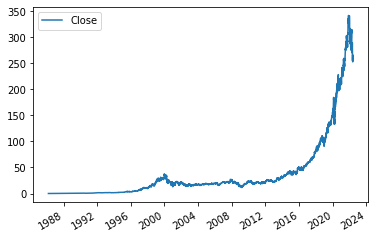

In [ ]:
# Visualize microsoft stock prices
msft_hist.plot.line(y="Close", use_index=True)

In [ ]:
# Sort DataFrame by date
msft_hist = msft_hist.sort_values('Date')

# Double check the result
msft_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055654,0.063838,0.055654,0.061109,1031788800,0.0,0.0
1986-03-14,0.061109,0.064383,0.061109,0.063292,308160000,0.0,0.0
1986-03-17,0.063292,0.064929,0.063292,0.064383,133171200,0.0,0.0
1986-03-18,0.064384,0.064929,0.062201,0.062746,67766400,0.0,0.0
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,0.0,0.0


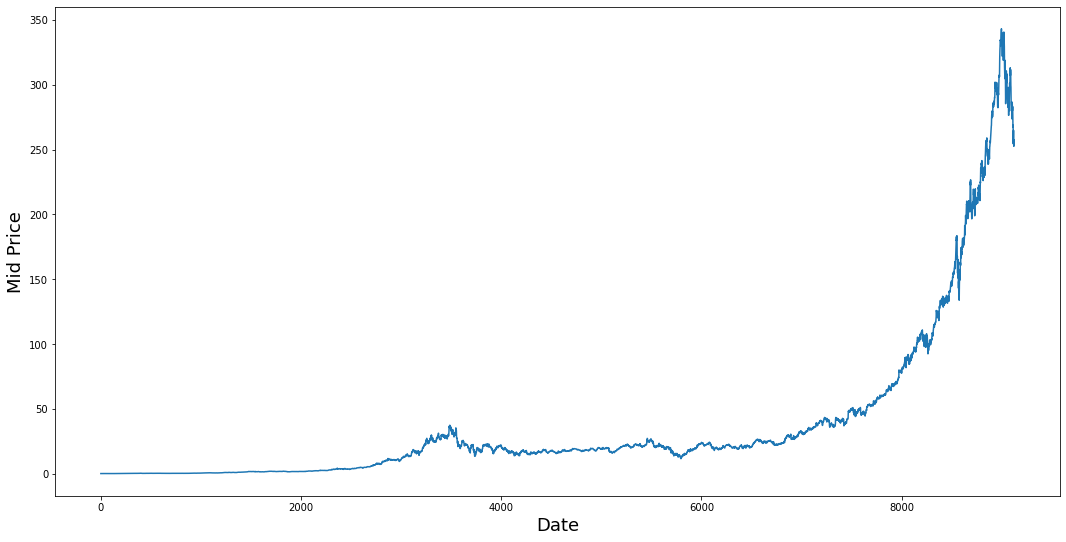

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(msft_hist.shape[0]),(msft_hist['Low']+msft_hist['High'])/2.0)
#plt.xticks(range(0,msft_hist.shape[0],500), msft_hist['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
# Ensure we know the actual closing price
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
data.head()

,Actual_Close,Target
1986-03-13,0.061109,NaN
1986-03-14,0.063292,1.0
1986-03-17,0.064384,1.0
1986-03-18,0.062746,0.0
1986-03-19,0.061655,0.0


In [ ]:
# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
msft_prev = msft_hist.copy()
msft_prev = msft_prev.shift(1)

In [ ]:
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.055654,0.063838,0.055654,0.061109,1.031789e+09,0.0,0.0
1986-03-17,0.061109,0.064383,0.061109,0.063292,3.081600e+08,0.0,0.0
1986-03-18,0.063292,0.064929,0.063292,0.064384,1.331712e+08,0.0,0.0
1986-03-19,0.064384,0.064929,0.062201,0.062746,6.776640e+07,0.0,0.0


- combining data

In [ ]:
# Create our training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(msft_prev[predictors]).iloc[1:]

In [ ]:
data.head()

,Actual_Close,Target,Close,Volume,Open,High,Low
1986-03-14,0.063292,1.0,0.061109,1.031789e+09,0.055654,0.063838,0.055654
1986-03-17,0.064384,1.0,0.063292,3.081600e+08,0.061109,0.064383,0.061109
1986-03-18,0.062746,0.0,0.064384,1.331712e+08,0.063292,0.064929,0.063292
1986-03-19,0.061655,0.0,0.062746,6.776640e+07,0.064384,0.064929,0.062201
1986-03-20,0.060018,0.0,0.061655,4.789440e+07,0.062746,0.063292,0.061109


- Creating a machine learning model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

- Training the model

In [ ]:
# Create a train and test set
train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

- Measuring error

In [ ]:
from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4731182795698925

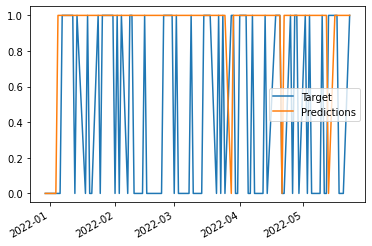

In [ ]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

- Backtesting

In [ ]:
i = 1000
step = 750

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()
model.fit(train[predictors], train["Target"])
preds = model.predict(test[predictors])

- Predicting probabilities

In [ ]:
preds = model.predict_proba(test[predictors])[:,1]
preds = pd.Series(preds, index=test.index)
preds[preds > .6] = 1
preds[preds<=.6] = 0

In [ ]:
preds.head()

1990-02-27    1.0
1990-02-28    1.0
1990-03-01    1.0
1990-03-02    1.0
1990-03-05    1.0
dtype: float64

- Pulling it into a loop

In [ ]:
predictions = []
# Loop over the dataset in increments
for i in range(1000, data.shape[0], step):
    # Split into train and test sets
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    # Fit the random forest model
    model.fit(train[predictors], train["Target"])

    # Make predictions
    preds = model.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .6] = 1
    preds[preds<=.6] = 0

    # Combine predictions and test values
    combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

    predictions.append(combined)

    

In [ ]:
predictions[0].head()

,Target,Predictions
1990-02-27,0.0,1.0
1990-02-28,1.0,1.0
1990-03-01,1.0,1.0
1990-03-02,1.0,1.0
1990-03-05,1.0,1.0


- Creating a backtesting function

In [ ]:
def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fit the random forest model
        model.fit(train[predictors], train["Target"])

        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

- Running the function

In [ ]:
predictions = backtest(data, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    7391
1.0     732
Name: Predictions, dtype: int64

In [ ]:
predictions["Target"].value_counts()

1.0    4116
0.0    4007
Name: Target, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5040983606557377

- Evaluating our predictions

0.0    7391
1.0     732
Name: Predictions, dtype: int64



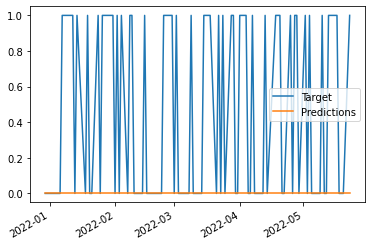

In [ ]:
# Show how many trades we would make

print(predictions["Predictions"].value_counts())
print()
# Look at trades we would have made in the last 100 days

predictions.iloc[-100:].plot()